In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from keras.layers import Input, Dense, Conv2D, Flatten
from keras.models import Model, Sequential
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [285]:
###시계열 데이터 load
"""
train_seq = np.load('train_gen_seq.npy')
train_seq_label = np.load('train_gen_seq_label.npy')
test_seq = np.load('test_gen_seq.npy')
test_seq_label = np.load('test_gen_seq_label.npy')
"""
train_seq = np.load('train_seq_30N_5out_mini_100w.npy')
train_seq_label = np.load('train_seq_label_30N_5out_mini_100w.npy')

In [286]:
# 정상 데이터만 학습
i, = np.where(train_seq_label==0)
X_train = train_seq[i]

In [287]:
train_seq.shape

(3008, 100, 17)

In [288]:
a, = np.where(train_seq_label==1)

In [289]:
np.sum(train_seq_label)

1500

In [290]:
X_train.shape

(1508, 100, 17)

In [291]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense, TimeDistributed, Dropout, RepeatVector
from keras.utils import plot_model
timestamp = X_train.shape[1]
nb_features = X_train.shape[2]
input_data = Input(shape=X_train.shape[1:])

x = LSTM(input_shape = (timestamp, nb_features), units=100)(input_data)
x = RepeatVector(timestamp)(x)

x = LSTM(units=50, return_sequences=True)(x)
decoded = TimeDistributed(Dense(units=17, activation='sigmoid'))(x)

autoencoder = Model(input_data, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [292]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 100, 17)           0         
_________________________________________________________________
lstm_25 (LSTM)               (None, 100)               47200     
_________________________________________________________________
repeat_vector_13 (RepeatVect (None, 100, 100)          0         
_________________________________________________________________
lstm_26 (LSTM)               (None, 100, 50)           30200     
_________________________________________________________________
time_distributed_13 (TimeDis (None, 100, 17)           867       
Total params: 78,267
Trainable params: 78,267
Non-trainable params: 0
_________________________________________________________________


In [293]:
autoencoder.fit(X_train, X_train, nb_epoch= 5, batch_size=256, shuffle=True, verbose=1) 

C:\Users\ARA\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/5
1508/1508 [==============================] - 10s 7ms/step - loss: 1.1409
Epoch 2/5
1508/1508 [==============================] - 7s 5ms/step - loss: 1.0522
Epoch 3/5
1508/1508 [==============================] - 7s 5ms/step - loss: 0.9240
Epoch 4/5
1508/1508 [==============================] - 6s 4ms/step - loss: 0.8345
Epoch 5/5
1508/1508 [==============================] - 6s 4ms/step - loss: 0.7821


In [294]:
lstm_predict = autoencoder.predict(train_seq)

In [295]:
lstm_predict = lstm_predict.reshape(lstm_predict.shape[0], lstm_predict.shape[1]* lstm_predict.shape[2])
lstm_predict.shape

(3008, 1700)

In [296]:
train_seq2 = train_seq.reshape(train_seq.shape[0], train_seq.shape[1]* train_seq.shape[2])
train_seq2.shape

(3008, 1700)

In [297]:
### calculate MSE
mse = mean_squared_error(train_seq2.T, lstm_predict.T, multioutput='raw_values')
mse.shape

(3008,)

In [298]:
np.max(mse), np.min(mse) , np.mean(mse)

(2.004377758533543, 0.38543713508889604, 0.8160537598139843)

In [299]:
### labeling
# mse < border
border = 1.
label= [0 if  mse[x] < border else 1 for x in range(0,len(mse)) ]
X_reduce = pd.DataFrame()
X_reduce['label'] = label
idx_0 = X_reduce[X_reduce.label == 0].index
idx_1 = X_reduce[X_reduce.label == 1].index
print(len(idx_0))
print(len(idx_1))

2255
753


In [300]:
np.sum(train_seq_label)

1500

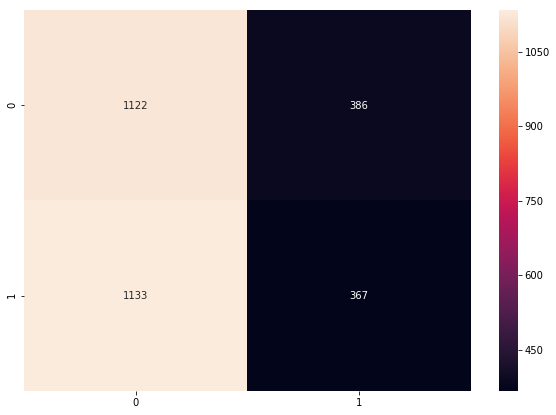

In [301]:
### plot confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

df_cm = pd.DataFrame(confusion_matrix(train_seq_label, X_reduce['label']))
plt.figure(figsize=(10,7))
sn.heatmap(df_cm, annot=True, fmt='d')

In [302]:
918/(582+918)

0.612

In [164]:
mse[80:90]

array([1.38099585, 1.38827794, 1.38066364, 1.37398023, 1.41828121,
       1.46789275, 1.46550679, 1.50616251, 1.50658919, 1.506455  ])

In [165]:
idx_1[20:40]

Int64Index([326, 330, 331, 419, 420, 485, 486, 487, 703, 704, 705, 706, 707,
            708, 709, 710, 713, 714, 715, 717],
           dtype='int64')

In [284]:
idx_1[train_seq_label[idx_1]==0][20:40] #index +1: 엑셀로 볼 때

Int64Index([ 81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91, 244, 245,
            246, 247, 248, 249, 250, 251, 252],
           dtype='int64')

In [ ]:
train_seq_label[]